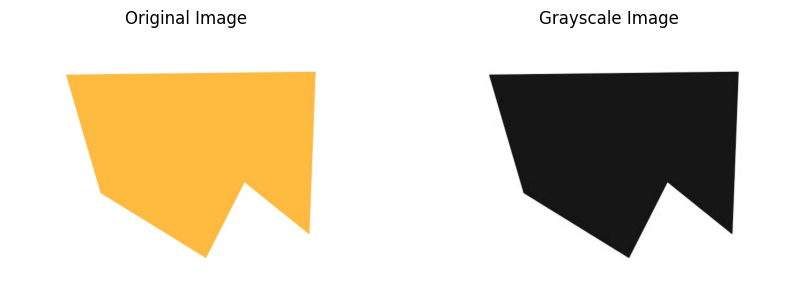

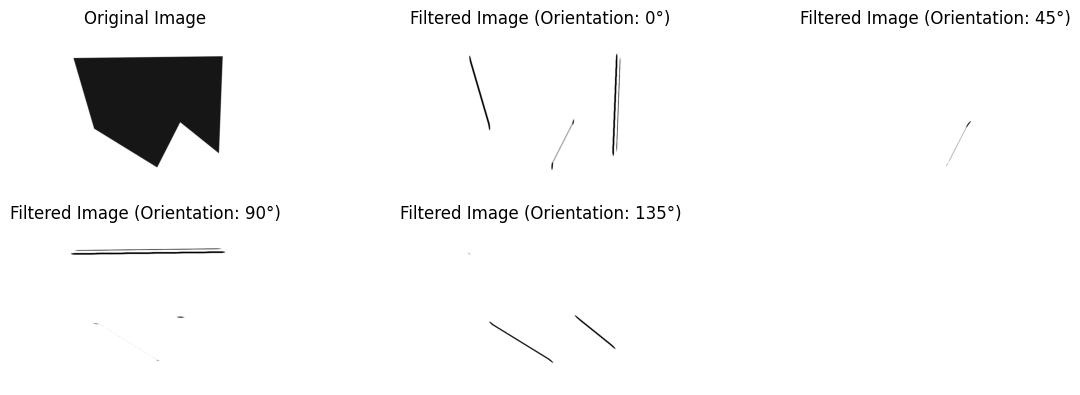

In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


# Load the image
image_path = 'E7-images/0017.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()
# Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract edges using Canny edge detection
edges = cv2.Canny(gray_image, 50, 150)



# Display the original and grayscale images
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Grayscale Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(gray_image, cmap='gray')
# plt.title('edges')
# plt.axis('off')

# plt.show()

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

def apply_gabor_filter(image, kernels):
    filtered_images = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in kernels]
    return filtered_images

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define parameters for Gabor filter
ksize = 31  # Kernel size (odd number)
sigma = 5   # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the normal to the parallel stripes
lambda_ = 10  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create Gabor kernels
kernels = []
for theta in np.arange(0, np.pi, np.pi / 4):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi)
    kernels.append(kernel)

# Apply Gabor filter to the image
filtered_images = apply_gabor_filter(image, kernels)

# Visualize results
plt.figure(figsize=(12, 6))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, filtered_image in enumerate(filtered_images):
    plt.subplot(3, 3, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image (Orientation: {i * 45}°)')
    plt.axis('off')

plt.tight_layout()
plt.show()

# # Display the image with contours
# cv2.imshow("Contours", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In the below 2 cells we are using both Canny detection and Gabor Filtering. Using Gabor filter we are counting textures and using cv2.canny also we are counting corners currently

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r'E7-images/1181.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Find corner points in the original image
corners = cv2.goodFeaturesToTrack(image, maxCorners=100, qualityLevel=0.01, minDistance=1)


print(corners)


# # Apply Canny edge detection
# edges = cv2.Canny(image,0,10)

# # Find contours in the edge image
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Count the number of contours (edges)
# num_edges = len(contours)

# print("Number of edges detected:", num_edges)


[[[543.  81.]]

 [[121.  84.]]

 [[550. 167.]]

 [[225. 410.]]

 [[553. 160.]]

 [[251. 408.]]

 [[140.  74.]]

 [[114. 307.]]

 [[528. 180.]]

 [[136. 341.]]

 [[310. 363.]]

 [[104. 276.]]

 [[543. 104.]]

 [[199. 394.]]

 [[116. 101.]]

 [[378. 326.]]

 [[117.  96.]]

 [[119.  90.]]

 [[420. 292.]]

 [[118.  94.]]

 [[113. 304.]]

 [[118.  92.]]

 [[112. 302.]]

 [[550. 141.]]

 [[550. 143.]]]


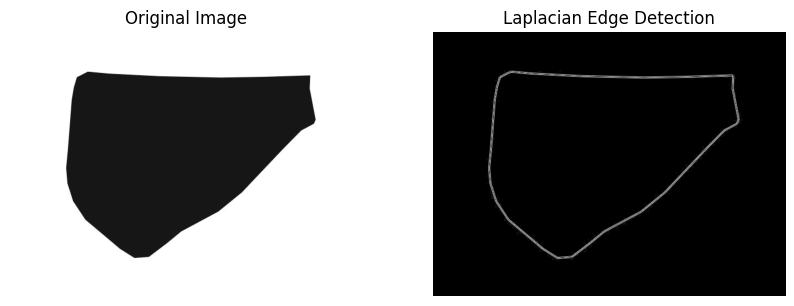

In [11]:
# Apply Gaussian blur to reduce noise
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert Laplacian image to uint8 and scale to [0, 255]
laplacian = np.uint8(np.absolute(laplacian))

# Plot the original image and the Laplacian edge detection result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

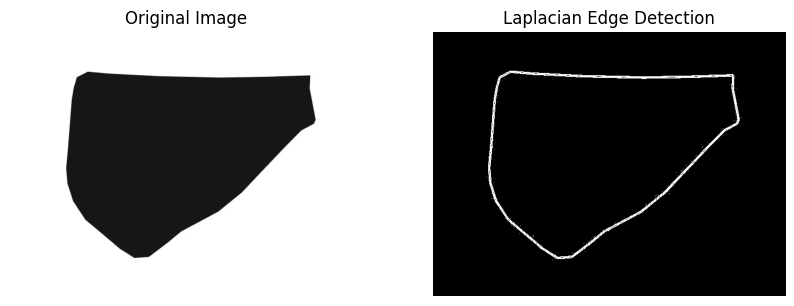

Number of edges detected: 15


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'E7-images/1181.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert Laplacian image to binary image
laplacian_binary = np.uint8(np.abs(laplacian) >3.9)  # Adjust the threshold as needed

# Find contours in the binary image
contours, _ = cv2.findContours(laplacian_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of contours (which correspond to edges)
num_edges = len(contours)

# Plot the original image and the Laplacian edge detection result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_binary, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

print("Number of edges detected:", num_edges)


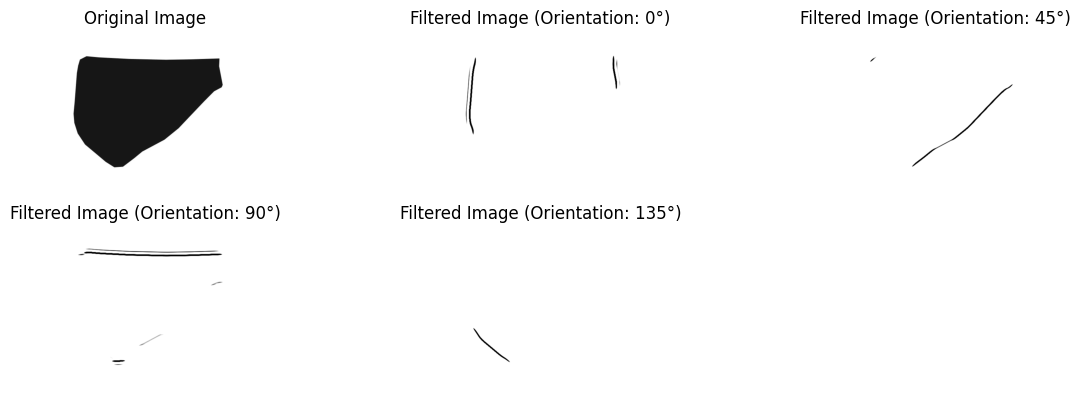

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)] [543.  81. 121.  84. 550. 167. 225. 410. 553. 160. 251. 408. 140.  74.
 114. 307. 528. 180. 136. 341. 310. 363. 104. 276. 543. 104. 199. 394.
 116. 101. 378. 326. 117.  96. 119.  90. 420. 292. 118.  94. 113. 304.
 118.  92. 112. 302. 550. 141. 550. 143.]
Number of edges detected: 4
Number of corners detected: 25


In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_gabor_filter(image, kernels):
    filtered_images = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in kernels]
    return filtered_images

# Load the image
image_path = 'E7-images/1181.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define parameters for Gabor filter
ksize = 31  # Kernel size (odd number)
sigma = 5   # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the normal to the parallel stripes
lambda_ = 10  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create Gabor kernels
kernels = []
for theta in np.arange(0, np.pi, np.pi / 4):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi)
    kernels.append(kernel)

# Apply Gabor filter to the image
filtered_images = apply_gabor_filter(image, kernels)


# Visualize results
plt.figure(figsize=(12, 6))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, filtered_image in enumerate(filtered_images):
    plt.subplot(3, 3, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image (Orientation: {i * 45}°)')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Return filtered images and corner points
filtered_images_flattened = [image.flatten() for image in filtered_images]
# print(corners)
print(filtered_images_flattened, corners.flatten())

# Binarize the filtered images (you can use thresholding or other techniques)
binary_images = [cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] for image in filtered_images]

# Find contours in the binary images
contours = [cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] for image in binary_images]

# Count the number of contours (edges)
num_edges = sum(len(contour) for contour in contours)

print("Number of edges detected:", num_edges)
print("Number of corners detected:", len(corners))



In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_gabor_filter(image, kernels):
    filtered_images = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in kernels]
    return filtered_images

# Load the image
image_path = 'E7-images/1181.jpg'   # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define parameters for Gabor filter
ksize = 31  # Kernel size (odd number)
sigma = 2.0  # Standard deviation of the Gaussian envelope (adjusted for more edges)
lambda_ = 5.0  # Wavelength of the sinusoidal factor (adjusted for more edges)
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create Gabor kernels
kernels = []
for theta in np.arange(0, np.pi, np.pi /4 ):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi)
    kernels.append(kernel)

# Apply Gabor filter to the image
filtered_images = apply_gabor_filter(image, kernels)

# Binarize the filtered images using adaptive thresholding
binary_images = [cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) for image in filtered_images]

# Find contours in the binary images
contours = [cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] for image in binary_images]

# Count the number of contours (edges)
num_edges = sum(len(contour) for contour in contours)

print("Number of edges detected:", num_edges)
print("Number of corners detected:", len(corners))


Number of edges detected: 4
Number of corners detected: 25


In [21]:
#The code written in this cell requires GPU, and we used Kaggle to run all the codes in our project since in  ost of the codes image preprocessing
#is required

import cv2
import numpy as np

# Load the image
image = cv2.imread('E7-images/1181.jpg' )

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to get a binary image
_, binary_image = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY)

# Invert the binary image
binary_image = cv2.bitwise_not(binary_image)

# Apply the inverted binary mask to the original image
result = cv2.bitwise_and(image, image, mask=binary_image)

# Display the result
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('E7-images/1181.jpg' )

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to get a binary image
_, binary_image = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY)

# Invert the binary image
binary_image = cv2.bitwise_not(binary_image)

# Apply the inverted binary mask to the original image
result = cv2.bitwise_and(image, image, mask=binary_image)

# Save the result
cv2.imwrite('/kaggle/working/result.jpg', result)


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('E7-images/1181.jpg' )

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for yellow color in HSV
# Define lower and upper bounds for yellow color in HSV
lower_yellow = np.array([15, 100, 100])
upper_yellow = np.array([35, 255, 255])


# Create a mask for yellow pixels
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Bitwise AND operation to extract yellow regions
yellow_image = cv2.bitwise_and(image, image, mask=yellow_mask)

# Save the yellow image
cv2.imwrite('/kaggle/working/yellow_image.jpg', yellow_image)


In [ ]:
#Counting the number of white and yellow pixels of an image to get idea of how much pixels were needed to be trained if we 
#simply passed the images

import cv2
import numpy as np

# Load the image
image = cv2.imread('E7-images/1181.jpg' )

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Define lower and upper bounds for white color in HSV
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# Create masks for yellow and white pixels
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
white_mask = cv2.inRange(hsv_image, lower_white, upper_white)

# Count the number of yellow and white pixels
yellow_pixel_count = cv2.countNonZero(yellow_mask)
white_pixel_count = cv2.countNonZero(white_mask)

print("Number of yellow pixels:", yellow_pixel_count)
print("Number of white pixels:", white_pixel_count)


In [ ]:
#Creating a mask to only train our CNN through yellow pixels since their count is way less than white ones. so if we only
#pass yellow pixels , our job would have been done
import cv2
import numpy as np

# Load the image
image = cv2.imread('E7-images/1181.jpg' )

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for yellow color in HSV(Hue,Saturation,Value)
lower_yellow = np.array([15, 100, 100])
upper_yellow = np.array([35, 255, 255])

# Create a mask for yellow pixels
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Apply the mask to the original image
yellow_region = cv2.bitwise_and(image, image, mask=yellow_mask)

# Now 'yellow_region' contains only the yellow pixels, you can use it as input to your CNN


In [ ]:
import shutil
import os

# Get the current working directory
working_directory = 'E7-images'

# List all files and directories in the working directory
files_and_directories = os.listdir(working_directory)

# Iterate over each file or directory and delete them
for item in files_and_directories:
    # Construct the full path to the file or directory
    item_path = os.path.join(working_directory, item)
    
    # Check if the item is a file or a directory
    if os.path.isfile(item_path):
        os.remove(item_path)  # Remove the file
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)  # Remove the directory and its contents recursively

print("Working directory cleared.")


In [ ]:
import os
import cv2
import numpy as np

# Path to the folder containing images
folder_path = 'E7-images'

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Convert image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define lower and upper bounds for yellow color in HSV
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([30, 255, 255])

        # Create a mask for yellow pixels
        yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

        # Apply the mask to the original image
        yellow_region = cv2.bitwise_and(image, image, mask=yellow_mask)

        # Save the yellow region mask
        output_path = os.path.join('E7-images-processed', filename)
        cv2.imwrite(output_path, yellow_region)

        print(f"Processed: {filename}")

print("All images processed.")


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_gabor_filter(image, kernels):
    filtered_images = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in kernels]
    return filtered_images

# Load the image
image_path = '/kaggle/input/e7-ds203/0001.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define parameters for Gabor filter
ksize = 31  # Kernel size (odd number)
sigma = 2.0  # Standard deviation of the Gaussian envelope
lambda_ = 5.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create Gabor kernels
kernels = []
for theta in np.arange(0, np.pi, np.pi / 4):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi)
    kernels.append(kernel)

# Apply Gabor filter to the image
filtered_images = apply_gabor_filter(image, kernels)

# Binarize the filtered images using adaptive thresholding
binary_images = [cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) for image in filtered_images]

# Visualize the filtered images and binary images
plt.figure(figsize=(12, 6))
plt.subplot(2, len(filtered_images) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (filtered_image, binary_image) in enumerate(zip(filtered_images, binary_images)):
    plt.subplot(2, len(filtered_images) + 1, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image {i + 1}')
    plt.axis('off')

    plt.subplot(2, len(filtered_images) + 1, len(filtered_images) + i + 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Binary Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
